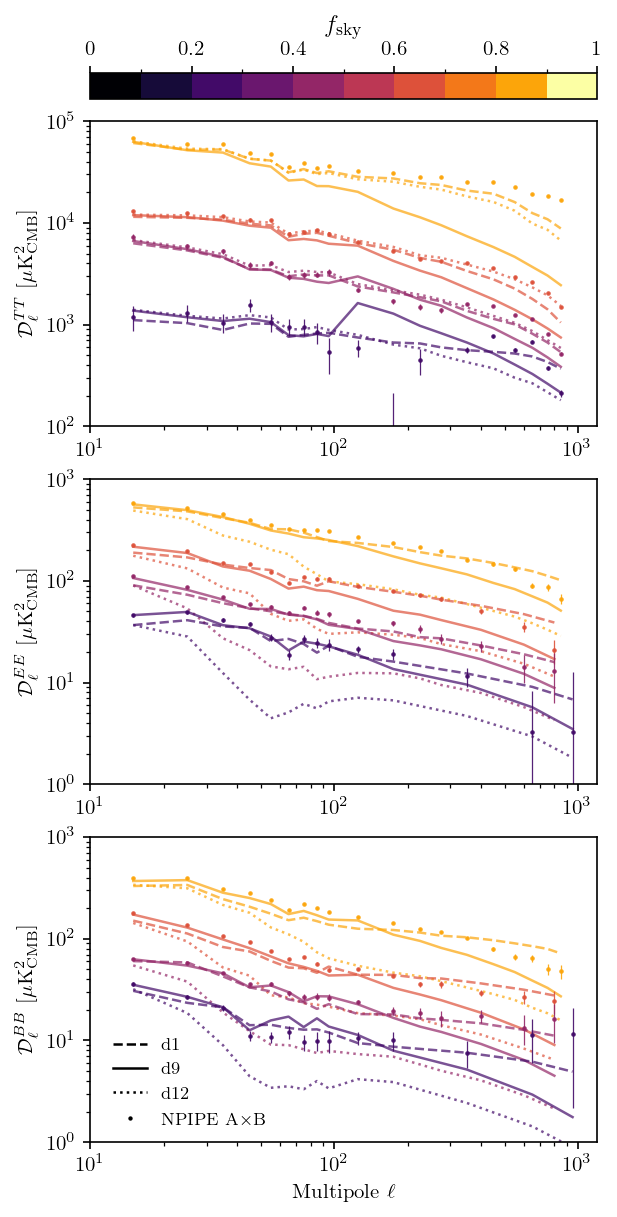

In [1]:
# 20240701:
# Plotting a TT/EE/BB graph of PR4 data split maps and PySM sim maps
# in 20/40/60/80% unmasked version
#
# Also calculate the error bars from 200 sim maps
#
# Note: run it in Python3! (module load bkhealpy)

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
import matplotlib as mpl

# Change font globally
#rc('font',**{'family':'serif', 'size': 12})
#rc('font',**{'family':'serif', 'size': 12})
mpl.rc('font',**{'family':'serif'})

# For \text command
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

# Show plot
plt.ion()
#plt.style.use('default')

# Set colors
n = 11
colors = plt.cm.inferno(np.linspace(0, 1., n))
fsky = np.linspace(0., 1., n)

# Label and font size
labelsize = 'medium'
fontsize = 'medium'

# line width and marker size
linewidth = 1.2
markersize = 1.2

# Unmasked fraction
mskfracs = ['080','060','040','020']

# Sim rlzs
rlzs = [200,400]
nrlz = rlzs[1] - rlzs[0]

# 3x1 plots
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3,ncols=1,figsize=(4,8),dpi=150,constrained_layout = True)
# Initial color index = the last one
cidx = n-1

for mskfrac in mskfracs:

    # Real data - PR4 353 GHz detector split
    txtname = 'data/largefield_DS_dl_GAL{}.txt'.format(mskfrac)
    # Get lc, dl 
    txtarray = np.loadtxt(txtname)
    lcT = txtarray[0,:]
    dltt_real = txtarray[1,:]
    lcP = txtarray[3,:]
    dlee_real = txtarray[4,:]
    dlbb_real = txtarray[6,:]

    # Split sim data - PR4 353 GHz detector split 
    dltt_splitsims = np.full((nrlz,np.size(lcT)),np.nan)
    dlee_splitsims = np.full((nrlz,np.size(lcP)),np.nan)
    dlbb_splitsims = np.full((nrlz,np.size(lcP)),np.nan)
    for rlz in np.arange(0,nrlz):
        
        txtname = 'data/largefield_DS_sims/largefield_DS_sims{:04d}_dl_GAL{}.txt'.format(rlz+rlzs[0],mskfrac)
        # Get dl
        txtarray = np.loadtxt(txtname)
        dltt_splitsims[rlz,:] = txtarray[1,:]
        dlee_splitsims[rlz,:] = txtarray[4,:]
        dlbb_splitsims[rlz,:] = txtarray[6,:]

    # Calculate the variance from these sims
    vartt_real = np.var(dltt_splitsims,axis=0) 
    varee_real = np.var(dlee_splitsims,axis=0) 
    varbb_real = np.var(dlbb_splitsims,axis=0) 

    # Truncate before zero padding
    if np.where(lcP==0)[0].size > 0:
        idx = np.where(lcP==0)[0][0]
    else:
        idx = lcP.size

    # PySM d1 Model
    txtname = 'data/pysm_3p4p0b9/largefield_d1_dl_GAL{}.txt'.format(mskfrac)
    txtarray = np.loadtxt(txtname)
    dltt_sims_d1 = txtarray[1,:]
    dlee_sims_d1 = txtarray[4,:]
    dlbb_sims_d1 = txtarray[6,:]

    # PySM d9 Model
    txtname = 'data/pysm_3p4p0b9/largefield_d9_dl_GAL{}.txt'.format(mskfrac)
    txtarray = np.loadtxt(txtname)
    dltt_sims_d9 = txtarray[1,:]
    dlee_sims_d9 = txtarray[4,:]
    dlbb_sims_d9 = txtarray[6,:]

    # PySM d12 Model
    txtname = 'data/pysm_3p4p0b9/largefield_d12_dl_GAL{}.txt'.format(mskfrac)
    txtarray = np.loadtxt(txtname)
    dltt_sims_d12 = txtarray[1,:]
    dlee_sims_d12 = txtarray[4,:]
    dlbb_sims_d12 = txtarray[6,:]
   
    # Define color index for each mask fraction plot
    cidx -= 2

    # CIB model 
    if False: 
        txtname = '../CIB_all_best_fit.txt'
        txtarray = np.loadtxt(txtname)
        ells = txtarray[:,0]
        ClCIB = txtarray[:,3] # in the unit of Jy^2/sr
        #Conversion from Jy/sr to K_CMB, according to table 1
        #https://www.aanda.org/articles/aa/pdf/2014/11/aa22093-13.pdf
        ClCIB = ClCIB/(287.450**2) #now in uK_CMB^2 sr
        DlCIB = ClCIB*ells*(ells+1)/2/np.pi
        # Full-sky plot
        ax1.plot(ells, DlCIB, '-', lw=0.60, color='k')

    # Plot TT
    ax1.errorbar(lcT, dltt_real, yerr=np.sqrt(vartt_real), fmt='o', ms=markersize, c=colors[cidx], alpha=0.9, elinewidth=linewidth*0.5)
    ax1.plot(lcT, dltt_sims_d1, '--', lw=linewidth, c=colors[cidx], alpha=0.7)
    ax1.plot(lcT, dltt_sims_d9, '-', lw=linewidth, c=colors[cidx], alpha=0.7)
    ax1.plot(lcT, dltt_sims_d12, ':', lw=linewidth, c=colors[cidx], alpha=0.7)
    
    # Plot EE
    ax2.errorbar(lcP, dlee_real, yerr=np.sqrt(varee_real), fmt='o', ms=markersize, c=colors[cidx], alpha=0.9, elinewidth=linewidth*0.5)
    ax2.plot(lcP[:idx], dlee_sims_d1[:idx], '--', lw=linewidth, c=colors[cidx], alpha=0.7)
    ax2.plot(lcP[:idx], dlee_sims_d9[:idx], '-', lw=linewidth, c=colors[cidx], alpha=0.7)
    ax2.plot(lcP[:idx], dlee_sims_d12[:idx], ':', lw=linewidth, c=colors[cidx], alpha=0.7)
    # Plot BB
    ax3.errorbar(lcP, dlbb_real, yerr=np.sqrt(varbb_real), fmt='o', ms=markersize, c=colors[cidx], alpha=0.9, elinewidth=linewidth*0.5)
    #ax3.plot(lcP[:idx], meanbb_res_real[:idx], '-', lw=linewidth, c='k') ####
    ax3.plot(lcP[:idx], dlbb_sims_d1[:idx], '--', lw=linewidth, c=colors[cidx], alpha=0.7)
    ax3.plot(lcP[:idx], dlbb_sims_d9[:idx], '-', lw=linewidth, c=colors[cidx], alpha=0.7)
    ax3.plot(lcP[:idx], dlbb_sims_d12[:idx], ':', lw=linewidth, c=colors[cidx], alpha=0.7)

# Plotting format
l1 = Line2D([0,1],[0,1],linestyle='--',lw=linewidth, color='k')
l2 = Line2D([0,1],[0,1],linestyle='-',lw=linewidth, color='k')
l3 = Line2D([0,1],[0,1],linestyle=':',lw=linewidth, color='k')
m1 = ax1.scatter([], [], c='k', marker='o', s=markersize)
#line_legend = fig.legend([l1, l2, l3, m1], ['d1','d9','d12','NPIPE AxB'],fontsize='small', bbox_to_anchor=(0.455, 0.17), frameon=False)
line_legend = fig.legend([l1, l2, l3, m1], ['d1','d9','d12',r'NPIPE A$\times$B'],fontsize='small', bbox_to_anchor=(0.455, 0.155), frameon=False)

ax1.loglog()
ax1.set_ylim(top=1e5,bottom=1e2)
ax1.set_xlim((10, 1200))
ax1.xaxis.set_tick_params(labelsize=labelsize)
ax1.yaxis.set_tick_params(labelsize=labelsize)
ax1.set_ylabel(r'$\mathcal{D}_\ell^{TT}$ [$\mu{\rm K^2_{CMB}}$]', fontsize=fontsize)

ax2.loglog()
ax2.set_ylim(top=1e3,bottom=1e0)
ax2.set_xlim((10, 1200))
ax2.xaxis.set_tick_params(labelsize=labelsize)
ax2.yaxis.set_tick_params(labelsize=labelsize)
ax2.set_ylabel(r'$\mathcal{D}_\ell^{EE}$ [$\mu{\rm K^2_{CMB}}$]', fontsize=fontsize)

ax3.loglog()
ax3.set_ylim(top=1e3,bottom=1e0)
ax3.set_xlim((10, 1200))
ax3.xaxis.set_tick_params(labelsize=labelsize)
ax3.yaxis.set_tick_params(labelsize=labelsize)
ax3.set_xlabel(r'Multipole $\ell$', fontsize=fontsize,)
ax3.set_ylabel(r'$\mathcal{D}_\ell^{BB}$ [$\mu{\rm K^2_{CMB}}$]', fontsize=fontsize)

cbar = plt.colorbar(ScalarMappable(norm=BoundaryNorm(fsky, ncolors=n), cmap=ListedColormap(colors)), ax=ax1, location='top')
cbar.ax.set_xticklabels([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
cbar.set_label(r'$f_{\rm sky}$',size=12)
cbar.ax.tick_params(labelsize=labelsize)

plt.savefig('largefield_power_all_TEB_pub.pdf', bbox_inches='tight', pad_inches=0.1)